In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [19]:
from keras.layers import BatchNormalization

In [12]:
from sklearn.datasets import make_circles

In [16]:
samples = 1000
X,y=make_circles(
    samples,
    noise=0.1,
    random_state=42
)
X.shape, y.shape

((1000, 2), (1000,))

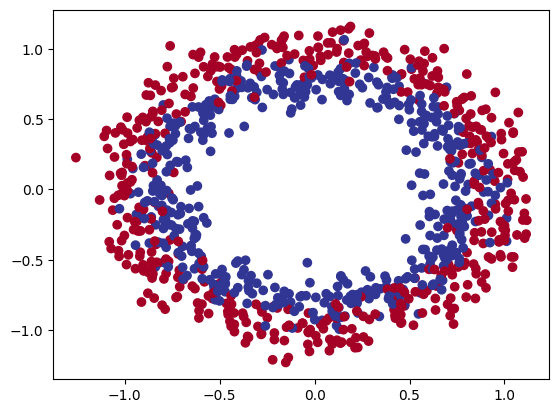

In [17]:
# Visualize this with a plot
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3,test_size=0.2)

In [20]:
model = Sequential()

model.add(Dense(2,activation="relu",input_dim=2))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss="binary_crossentropy",optimizer = "adam",metrics=["accuracy"])

In [23]:
records1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
25/25 [==============================] - 4s 44ms/step - loss: 0.7888 - accuracy: 0.5075 - val_loss: 0.8485 - val_accuracy: 0.4600
Epoch 2/200
25/25 [==============================] - 0s 14ms/step - loss: 0.7636 - accuracy: 0.5113 - val_loss: 0.8193 - val_accuracy: 0.4550
Epoch 3/200
25/25 [==============================] - 0s 11ms/step - loss: 0.7434 - accuracy: 0.5038 - val_loss: 0.7951 - val_accuracy: 0.4450
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.7272 - accuracy: 0.5175 - val_loss: 0.7766 - val_accuracy: 0.4450
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.7152 - accuracy: 0.5300 - val_loss: 0.7610 - val_accuracy: 0.4500
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.7059 - accuracy: 0.5300 - val_loss: 0.7478 - val_accuracy: 0.4250
Epoch 7/200
25/25 [==============================] - 0s 7ms/step - loss: 0.6986 - accuracy: 0.5350 - val_loss: 0.7383 - val_accuracy: 0.4300
Epoch 8/20

**Model with Batch Normalization**

In [25]:
model2 = Sequential()
model2.add(Dense(3,activation="relu",input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(2,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dense(1,activation="sigmoid"))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization_2 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_3 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [26]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [27]:
records2 = model2.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
25/25 [==============================] - 4s 26ms/step - loss: 0.7837 - accuracy: 0.4950 - val_loss: 0.6999 - val_accuracy: 0.4500
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 0.7632 - accuracy: 0.5100 - val_loss: 0.7014 - val_accuracy: 0.4450
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7564 - accuracy: 0.5013 - val_loss: 0.7036 - val_accuracy: 0.4600
Epoch 4/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7380 - accuracy: 0.5075 - val_loss: 0.7059 - val_accuracy: 0.4750
Epoch 5/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7215 - accuracy: 0.5225 - val_loss: 0.7070 - val_accuracy: 0.4750
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7205 - accuracy: 0.5213 - val_loss: 0.7068 - val_accuracy: 0.4750
Epoch 7/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7077 - accuracy: 0.5213 - val_loss: 0.7069 - val_accuracy: 0.4900
Epoch 8/200


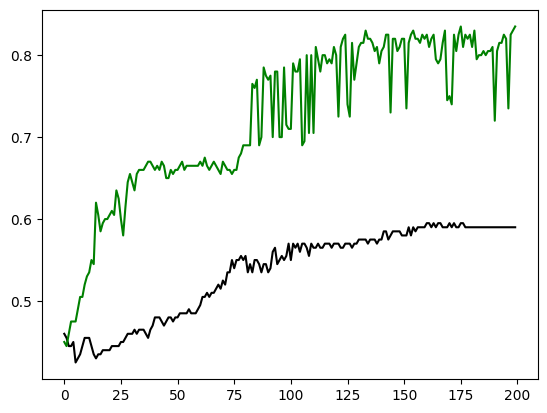

In [29]:
plt.plot(records1.history["val_accuracy"],color="black")
plt.plot(records2.history["val_accuracy"],color="green")
plt.show()